# Modelos Lineares
---

Imagine que temos novamente um conjunto de dados de casas e seus preços, conforme apresentado abaixo:

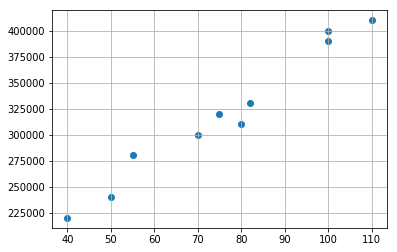

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

H = np.array([[100],
[110],  
[50],  
[70],  
[80],  
[40],
[100],
[55],
[75],
[82]])

P = np.array([400000, 410000, 240000, 300000, 310000, 220000, 390000, 280000, 320000, 330000])

plt.scatter(H[:,0], P)
plt.grid()

Olhe para o gráfico acima e veja que forma parece está se formando. Posso não entender de alinhamentos planetários, mas uma coisa posso dizer: esses dados lembram uma reta!

Podemos definir uma reta que passa pela origem (ponto (0,0)) e definir o ângulo dela, por exemplo. Vamos tentar!

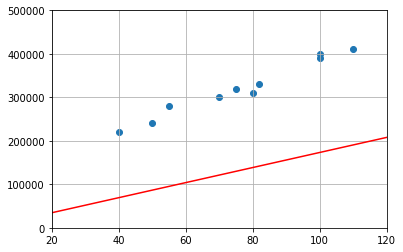

In [2]:
from math import sin, cos, radians
theta = radians(30)
linelength = 200
x = linelength * cos(theta)
y = linelength * sin(theta) * 3000
plt.scatter(H[:,0], P)
plt.plot(np.array([0,x]),np.array([0,y]), c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

É, não ficou muito legal. Mas já é um começo!

Que outra maneira podemos definir uma reta? 
    
**Que tal definir uma função?**

    Opa, parece um plano... Vamos ver no que dá!

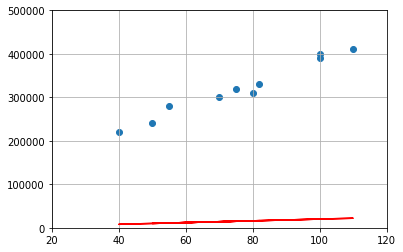

In [3]:
def f(x):
    a = 200
    b = 20
    return a*x + b # f(x) = ax + b

plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[f(x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

Não é que ficou interessante? Mas ficar procurando valores para *a* e *b* foi um pouco chato, né? Seria tão legal se houvesse uma maneira *automática* de fazer isso... se pudéssemos fazer o computador *aprender* esses valores...

CLARO QUE TEM UMA MANEIRA, GENTE!

## Regressão Linear

Como acabamos de ver, podemos definir uma função para representar nosso **modelo** de dados:

$$ \hat{y} = b + w \cdot x $$

In [4]:
w = 2000
b = 200000

def predict(w,b,x):
    return b + (w * x)

Podemos ter diversas combinações de valores para *w* e *b*. A pergunta é: qual usar?

Vamos pensar um pouco:

* Para cada par (w,b) que escolhamos, geraremos um novo modelo $\hat{y}$
* Para cada modelo gerado, ele vai estimar valores diferentes para um dado $x_i$
* Essa estimativa terá um **erro** em relação ao valor correto $(y - \hat{y})$
* Se eu somar todos o erro de cada $x_i$ de uma combinação (w,b), nós teremos o erro do modelo (w,b) ( **E(w,b)** )
* Logo, basta achar uma combinação (w,b) que tenha o menor erro possível!

### Tá, mas como que faz isso?

Isso, jovem, é um problema de ***otimização***. A solução varia de acordo com o cálculo que você usa para calcular o erro. Uma métrica de erro muito comum utilizada é o *Erro quadrático*, o qual subtrai $y - \hat{y}$ e eleva o valor ao quadrado.

Há um dito popular que diz "*É errando que se aprende*". Bom, se é assim, então vamos deixar o computador ficar errando os valores e aprender com isso! Como foi dito, isso é um problema de otimização. Para resolvê-lo, utilizamos a técnica do **gradiente descendente**, a qual, após uma série de *abracadabras* matemáticos, chega na seguinte fórmula:

$$ w_{k+1} = w_{k} - \alpha ( \frac {2} {N} \sum_{i=1}^N (-x_i \cdot (y_i - \hat{y_i})) ) $$

$$ b_{k+1} = b_k - \alpha (\frac {2} {N} \sum_{i=1}^N -(y_i - \hat{y_i})) $$

A primeira fórmula diz o seguinte: para eu aprender um novo valor $w_{k+1}$, vou atualizar o valor $w_k$ que eu já tenho a partir de um gradiente(somatório entre parênteses) utilizando um fator de aprendizagem $\alpha$. Esse gradiente vêm do cálculo da derivada da função do erro quadrático. O mesmo vale para a segunda fórmula.

Sinta-se convidado a buscar na internet a demonstração da fórmula. É um conhecimento bem interessante para caso um dia você tenha de implementar seu próprio gradiente.

Agora chega de papo e vamos programar!

In [5]:
def gradient_descendent(train_X, train_Y, alpha, w = 0, b = 0):
    sum_error = 0
    elem_times_error = 0
    n = len(train_X)
    for x,y in zip(train_X, train_Y):
        yhat = predict(w, b, x)
        error = y - yhat
        sum_error += error
        elem_times_error += x * error
            
    b = b + (2 * (alpha * sum_error) / n)
    w = w + (2 * (alpha * elem_times_error) / n)
    return (w,b)

Vamos iniciar nossos valores de $w$ e $b$ como 0 e ver o que temos

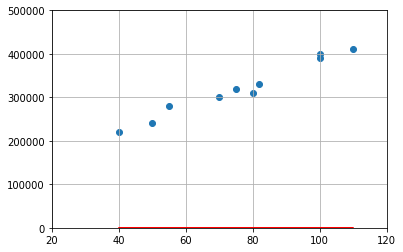

In [6]:
w = 0
b = 0
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[predict(w,b,x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

Ok, nosso modelo só estima 0 para todo mundo. Vamos aplicar o cálculo do gradiente descendente uma vez, com um passo de aprendizagem bem pequeno, e ver como que fica

w: 514.32	b: 6.4


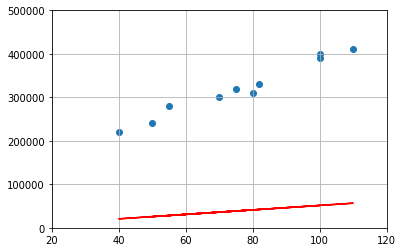

In [7]:
w,b = gradient_descendent(H[:,0], P, 0.00001, w, b)
print("w: {}\tb: {}".format(w,b))
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[predict(w,b,x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

Já deu uma melhorada, não foi? Continue rodando a célula acima e veja se o modelo aprende!

**OBS:** se os valores de $w$ e $b$ começarem a variar muito pouco, ou sejá, o modelo não consegue ficar melhor, dizemos que ele **convergiu**

### Legal, mas me diz que já existe algo pronto, pro favor...

Claro que existe!

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Olha como é fácil criar um modelo de Regressão Linear:

In [9]:
model = LinearRegression()

Olha como é ainda mais fácil treinar esse modelo!

In [10]:
model.fit(H,P)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Vamos ver como que fica?

Mean Error: 10539.347432900066


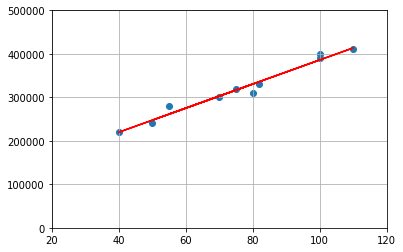

In [11]:
y_predicted = model.predict(H)
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),y_predicted, c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

error = np.sqrt(mean_squared_error(P,y_predicted))
print("Mean Error: {}".format(error))

Legal, não é?

### Pausa para o vinho

Calma, claro que não vamos parar essa aula maravilhosa para tomar vinho(embora não pareça uma má ideia), mas que tal se a gente misturasse essas duas coisas lindas juntas: vinhos e regressão linear?

No arquivo *winequality-white.csv* temos um conjunto de dados de qualidade do vinho que envolve a previsão da qualidade dos vinhos brancos em uma escala, com medidas químicas de cada vinho. É um problema de classificação multiclasse (algo que veremos mais na frente), mas também pode ser enquadrado como um problema de regressão. O número de observações para cada classe não é equilibrado. Existem 4.898 observações com 11 atributos de entrada e 1 atributo de saída. Os nomes das variáveis são os seguintes:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide. 
7. Total sulfur dioxide. 
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

Que tal você fazer um modelo de regressão linear que seja capaz de aproximar a qualidade dessas bebidas? Ainda vou ser legal e vou deixar os dados carregados na memória para você!

In [12]:
import pandas as pd
data = pd.read_csv("winequality-white.csv", delimiter=';')
data.head()

FileNotFoundError: [Errno 2] File b'winequality-white.csv' does not exist: b'winequality-white.csv'

## Regressão Logística

(Infelizmente) Não podemos resolver todos os problemas de aprendizagem supervisionada com uma reta. Vejamos o exemplo a seguir

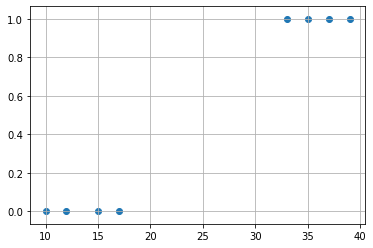

In [18]:
M = np.array([[10],[12],[15],[17], [33],[35],[37],[39]])
V = np.array([0,0,0,0,1,1,1,1])

plt.scatter(M, V)
plt.grid()

Será que dá para traçar uma reta para resolver esse problema?

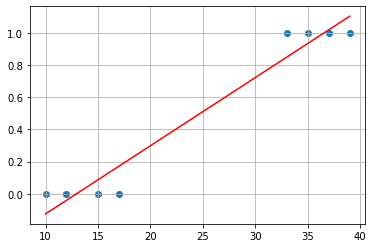

In [19]:
model = LinearRegression()
model.fit(M,V)
y_predicted_linear = model.predict(M)
plt.scatter(M, V)
plt.grid()
plt.plot(M,y_predicted_linear, c='r')

É, não ficou legal... mas por quê?

No eixo Y, temos apenas dois valores: 0 e 1. Ou seja, nosso modelo tem de prever um desses dois valores. Nesse caso, a saída do modelo é *discreta*. Isso é diferente do nosso exemplo anterior, onde tínhamos uma saída *contínua*. Isso quer dizer que lidamos com um problema de ***classificação***!

### Tá, o problema é outro agora, mas como que resolve?

Bom, nesse caso, teremos de usar outro tipo de função que não seja a linear. Para isso, usaremos a **Função Logística**!

$$ \hat{y} = \frac {1} {1 + e^{-(b+w \cdot x)}} $$

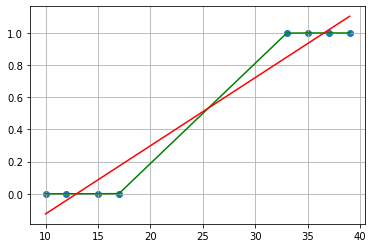

In [20]:
from math import exp
def logistic_function(w,b,x):
    return 1 / ( 1 + exp( - ( b+(w*x) ) ) )

w = 0.89
b = -22.1
plt.scatter(M, V)
plt.grid()
plt.plot(M, [logistic_function(w,b,x) for x in M[:,0]], c='g')
plt.plot(M,y_predicted_linear, c='r')

Opa, agora ficou legal!

Assim como a Regressão Linear, a **Regressão Logística** também pode ser mapeada para um problema de otimização para encontrar o menor erro para $w$ e $b$. A prova é TRIVIAL(só que não) e análoga à do gradiente descendente mostrado anteriormente. Deixamos como exercício pesquisar sobre ela.

Agora, vamos utilizar a função para criar o modelo de regressão disponível na biblioteca scikit learn.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(penalty="l2", C=1e42) #estes argumentos desabilitam a regularização
model.fit(M,V)

C:\Users\Livia\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Vamos ver se fica legal?

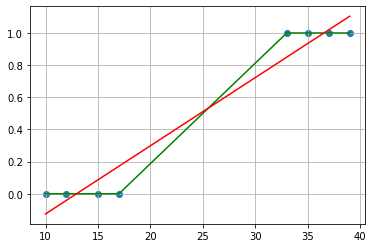

In [23]:
y_predicted = model.predict(M)
plt.scatter(M, V)
plt.grid()
plt.plot(M,y_predicted, c='g')
plt.plot(M,y_predicted_linear, c='r')

### Tá, mas você disse que a aula era de modelos lineares. A função logística não é uma linha, pelo menos não uma reta. Que pegadinha é essa?

Não tem pegadinha nenhuma, é só uma questão de *perspectiva*. Se tentarmos visualizar os dados no espaço é como se houvesse uma *linha* separando os conjuntos de dados! Para ser mais algébrico, a função logística define um *hiperplano* que separa os dados!

Para ficar mais simples de entender, dê uma olhada na figura abaixo:

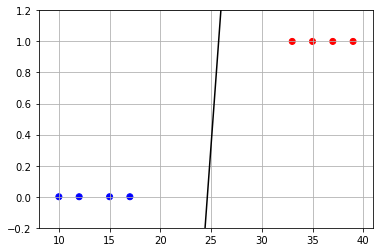

In [24]:
points_x=[x for x in range(10,41)]

line_bias = model.intercept_
line_w = model.coef_.T
points_y=[(line_w[0]*x+line_bias) for x in points_x]
plt.plot(points_x, points_y, 'k')
plt.scatter(M,V,c=["b" if v == 0 else "r" for v in V])
plt.xlim((8,41))
plt.ylim((-0.2,1.2))
plt.grid()

A linha preta mostra a **superfície de decisão** gerada pela função logística aprendida: tudo o que está à direita da linha é classificado como vermelho, enquanto o que está à esquerda, azul.

### Se for dirijir, não beba. Se for beber, beba vinho

Usando o dataset disponível e a técnica de regressão linear, resolva o problema de estimar a qualidade dos vihnhos.